<font size="12">Fremont Bridge Project</font>

In [1]:
URL = 'https://data.seattle.gov/resource/65db-xm6k.csv?$query=SELECT%0A%20%20%60date%60%2C%0A%20%20%60fremont_bridge%60%2C%0A%20%20%60fremont_bridge_nb%60%2C%0A%20%20%60fremont_bridge_sb%60%0AORDER%20BY%20%60date%60%20DESC%20NULL%20FIRST'

In [3]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x2320fab5d90>)

In [6]:
import pandas as pd
data = pd.read_csv('Fremont.csv', index_col='date', parse_dates=True)
data.head()

,fremont_bridge,fremont_bridge_nb,fremont_bridge_sb
date,,,
2024-06-30 23:00:00,18,9,9
2024-06-30 22:00:00,32,10,22
2024-06-30 21:00:00,52,13,39
2024-06-30 20:00:00,121,37,84
2024-06-30 19:00:00,125,57,68


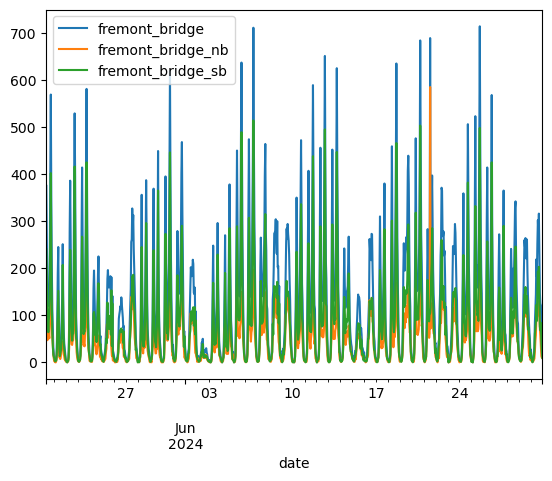

In [9]:
%matplotlib inline
data.plot();

C:\Users\alias\AppData\Local\Temp\ipykernel_12964\2327669347.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.resample('H').sum().rolling(365).sum().plot();


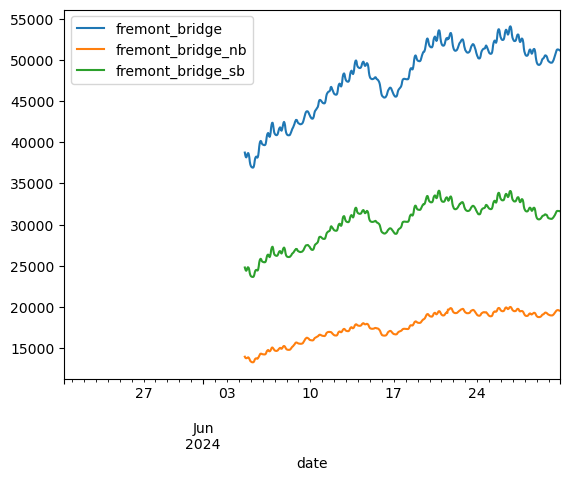

In [17]:
data.resample('H').sum().rolling(365).sum().plot();

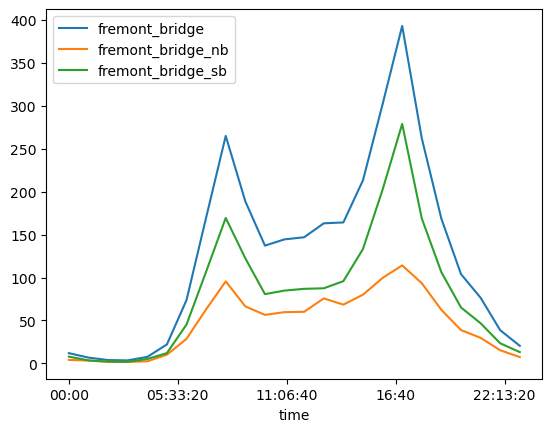

In [18]:
data.groupby(data.index.time).mean().plot();

In [25]:
pivoted = data.pivot_table('fremont_bridge', index=data.index.time, columns=data.index.date)
pivoted.iloc[:11,:11]

,2024-05-20,2024-05-21,2024-05-22,2024-05-23,2024-05-24,2024-05-25,2024-05-26,2024-05-27,2024-05-28,2024-05-29,2024-05-30
00:00:00,NaN,11.0,4.0,6.0,8.0,16.0,14.0,11.0,3.0,9.0,3.0
01:00:00,NaN,7.0,2.0,3.0,5.0,6.0,9.0,5.0,1.0,3.0,1.0
02:00:00,NaN,2.0,0.0,4.0,4.0,8.0,3.0,1.0,3.0,3.0,1.0
03:00:00,NaN,4.0,3.0,6.0,3.0,3.0,3.0,3.0,1.0,6.0,1.0
04:00:00,NaN,7.0,5.0,12.0,5.0,6.0,2.0,5.0,11.0,7.0,10.0
05:00:00,NaN,28.0,22.0,34.0,27.0,14.0,3.0,7.0,22.0,30.0,15.0
06:00:00,NaN,86.0,89.0,100.0,72.0,22.0,8.0,19.0,79.0,87.0,92.0
07:00:00,NaN,188.0,280.0,282.0,157.0,31.0,7.0,29.0,236.0,264.0,276.0
08:00:00,375.0,245.0,386.0,414.0,195.0,61.0,19.0,85.0,356.0,369.0,395.0
09:00:00,255.0,121.0,255.0,257.0,150.0,80.0,45.0,118.0,188.0,219.0,266.0


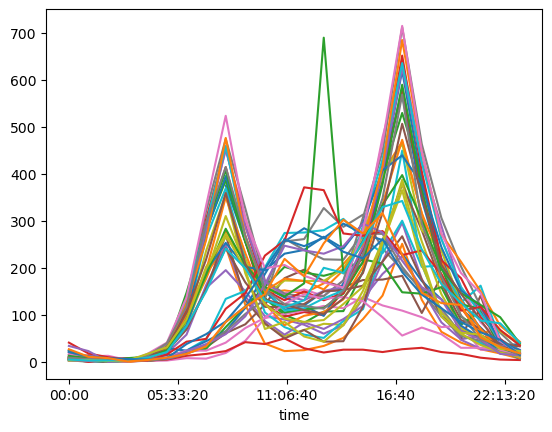

In [32]:
pivoted.plot(legend=False);